In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

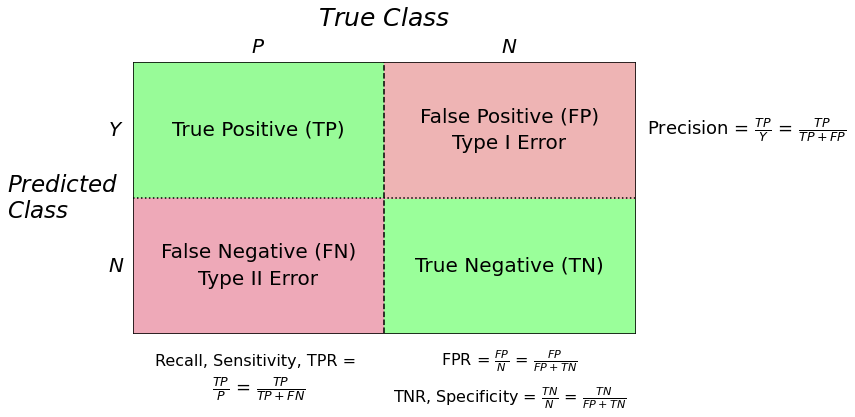

In [3]:
plt.figure(figsize=(9,5))
plt.text(0.5,2.25,'True Positive (TP)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1.5,2.4,'False Positive (FP)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(0.5,0.9,'False Negative (FN)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1.5,0.75,'True Negative (TN)',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(1,3.4,'$True\ Class$',size=25,horizontalalignment="center")
plt.text(-0.5,1.5,'$Predicted$\n$Class$',size=23,verticalalignment="center")
plt.text(0.5,3.1,'$P$',size=20,horizontalalignment="center")
plt.text(1.5,3.1,'$N$',size=20,horizontalalignment="center")
plt.text(-0.1,2.25,'$Y$',size=20,va="center")
plt.text(-0.1,0.75,'$N$',size=20,va="center")
plt.text(2.45,2.25,r'Precision = $\frac{TP}{Y}$ = $\frac{TP}{TP+FP}$ ',size=18,ha="center",va="center")
plt.text(0.5,-0.3,'Recall, Sensitivity, TPR = ',size=16,ha="center",va="center")
plt.text(0.5,-0.6,'$\\frac{TP}{P}$ = $\\frac{TP}{TP+FN}$',size=18,ha="center",va="center")
plt.text(1.5,-0.3,'FPR = $\\frac{FP}{N}$ = $\\frac{FP}{FP+TN}$',size=16,ha="center",va="center")
plt.text(1.5,-0.7,'TNR, Specificity = $\\frac{TN}{N}$ = $\\frac{TN}{FP+TN}$',size=16,ha="center",va="center")
plt.text(1.5,2.1,'Type I Error',size=20,horizontalalignment="center",verticalalignment="center")
plt.text(0.5,0.6,'Type II Error',size=20,horizontalalignment="center",verticalalignment="center")
plt.xticks([])
plt.yticks([])
plt.plot([1,1],[0,3],'k--')
plt.plot([0,3],[1.5,1.5],'k:')
plt.axis([0,2,0,3])

plt.fill_between([0,1],[1.5,1.5],[3,3],color='#98FB98')
plt.fill_between([0,1],[0,0],[1.5,1.5],color='#EEA9B8')
plt.fill_between([1,2],[0,0],[1.5,1.5],color='#9AFF9A')
plt.fill_between([1,2],[1.5,1.5],[3,3],color='#EEB4B4')

In [4]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [5]:
# 生成随机的n类分类问题 2000个样本 一个样本十个特征
X,y = make_classification(n_samples=2000, n_features=10, n_informative=4,
                         n_redundant=1, n_classes=2, n_clusters_per_class=1,
                         weights=[0.9,0.1], flip_y=0.1, random_state=2018)
X.shape, y.shape

((2000, 10), (2000,))

In [6]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [7]:
X_pca = pca.fit_transform(X)
X_pca.shape

(2000, 2)

In [8]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns=["pca_a","pca_b"]
X_pca["y"] = y

In [9]:
# 查看数据前三列
X_pca[:3]

,pca_a,pca_b,y
0,0.864326,0.244849,0
1,0.785760,0.282311,0
2,2.396793,1.376426,1


/home/roczhang/anaconda3/envs/dataAna/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/roczhang/anaconda3/envs/dataAna/lib/python3.6/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.210000000000008, 0.5, 'axis_2')

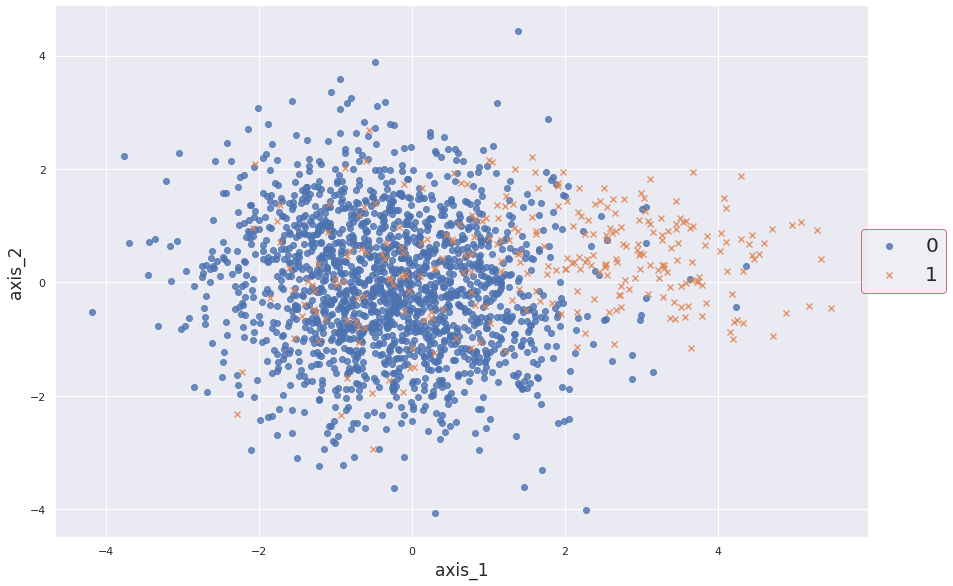

In [10]:
sns.set()
# "pca_a","pca_b"列名
sns.lmplot("pca_a","pca_b",data=X_pca, hue="y", fit_reg=False, markers=["o","x"],size=8,aspect=1.5,legend=False)
plt.legend(fontsize=20,bbox_to_anchor=(0.98, 0.6),edgecolor ='r')   
plt.xlabel("axis_1",fontsize=17)
plt.ylabel("axis_2",fontsize=17)

ROC

In [11]:
# 提供训练/测试索引以将数据拆分为训练/测试集。
kf = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 
X_train.shape, X_test.shape

((1000, 10), (1000, 10))

In [12]:
# 线性回归的训练
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [13]:
# 线性回归的测试
lr.score(X_test,y_test)

0.936

In [14]:
# 概率估计。所有类别的返回估计值均按类别标签排序。
pos_prob_lr = lr.predict_proba(X_test)[:,1]
pos_prob_lr[0:5], y_test.shape

(array([0.16073409, 0.03644585, 0.88223396, 0.09386665, 0.110397  ]), (1000,))

In [15]:
# 随机森林训练
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [16]:
# 随机森林测试
rf.score(X_test,y_test)

0.938

In [17]:
pos_prob_rf = rf.predict_proba(X_test)[:,1]

In [18]:
# 求roc
def get_roc(pos_prob,y_true):
    
    pos = y_true[y_true==1]  # 145
    neg = y_true[y_true==0]  # 855
    # [::-1]逆序切片
    threshold = np.sort(pos_prob)[::-1]  # 按预测为正的概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]
    
    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))  # 0.0011695906432748538
    y_step = 1/float(len(pos))  # 0.006896551724137931
    y_sum = 0                             
    for i in range(len(threshold)):  # 1000
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr             # fpr加一个样本，y_sum累计。计算面积
    return tpr_all,fpr_all,y_sum*x_step  # 获得总体TPR，FPR和相应的AUC

In [19]:
tpr_lr,fpr_lr,auc_lr = get_roc(pos_prob_lr,y_test)
tpr_rf,fpr_rf,auc_rf = get_roc(pos_prob_rf,y_test)
len(tpr_lr)

1001

In [20]:
1/float(145)

0.006896551724137931

In [21]:
np.sort(pos_prob_lr)[::-1]

array([0.99989176, 0.99963961, 0.99945743, 0.99943663, 0.99941207,
       0.99931222, 0.99920774, 0.99920245, 0.99920169, 0.9988901 ,
       0.99885963, 0.998311  , 0.9982213 , 0.9980849 , 0.99751934,
       0.99746018, 0.99733807, 0.99729521, 0.99719826, 0.99719446,
       0.99689765, 0.99594735, 0.99555214, 0.99552106, 0.99483002,
       0.99251746, 0.99180126, 0.99123061, 0.98833376, 0.98829486,
       0.98657925, 0.98617005, 0.98520498, 0.98429202, 0.98215607,
       0.98094651, 0.97775741, 0.97770427, 0.97717051, 0.97519274,
       0.97323258, 0.97233773, 0.97225206, 0.97154515, 0.96904023,
       0.96736987, 0.96628886, 0.96577467, 0.96513071, 0.96305103,
       0.96267986, 0.96113689, 0.95739844, 0.95645659, 0.95351093,
       0.95179416, 0.94893578, 0.94854981, 0.9471008 , 0.94454379,
       0.94111422, 0.93813788, 0.92337908, 0.9226886 , 0.92139373,
       0.91600493, 0.91056477, 0.90736838, 0.89346162, 0.88223396,
       0.87783522, 0.87436557, 0.86522252, 0.85487783, 0.84732

In [46]:
auc_lr

0.7955878201250284

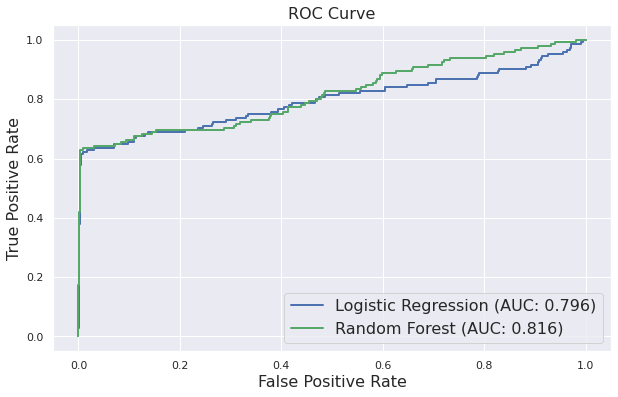

In [48]:
plt.figure(figsize=(10,6))
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression (AUC: {:.3f})".format(auc_lr),linewidth=2)
plt.plot(fpr_rf,tpr_rf,'g',label="Random Forest (AUC: {:.3f})".format(auc_rf),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)

In [22]:
print()